#  `chord_counts`

Calculates the length of each chord in the input image that contains chords drawn in the void space.  It works by labeling each chord and using Scikit image regionprops to measure the length of each chord (number of pixels in the chord).


In [7]:
import matplotlib.pyplot as plt
import numpy as np
import porespy as ps

## `im`
The input image ontaining chords drawn in the void space. This image can be generated by implementing `apply_chords` filter on a binary image. We can use `blobs` generator to generate a test image and draw chords in void space (in x direction by default) using `apply_chords`.

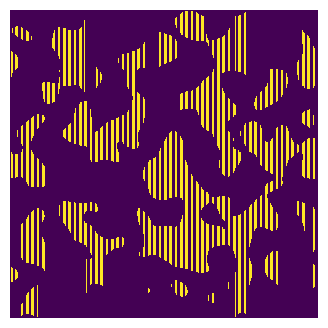

In [8]:
im = ps.generators.blobs(shape=[500, 500], seed=0)
im = ps.filters.apply_chords(im)
fig, ax = plt.subplots(1, 1, figsize=[4, 4])
ax.imshow(im, origin="lower", interpolation="none")
ax.axis(False);

Now the test image is ready to be passed to `chord_counts`. The method returns a 1D array. Each element in the array corresponds to the length of each chord. A histogram of the chord length array can be plotted:

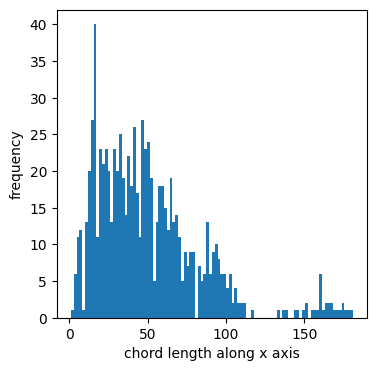

In [9]:
chord_length = ps.metrics.chord_counts(im=im)
fig, ax = plt.subplots(1, 1, figsize=[4, 4])
ax.hist(chord_length, bins=100)
plt.xlabel("chord length along x axis")
plt.ylabel("frequency");

An alternative to the histogram, we can use `numpy.bincount` that gives the number of chords of each length and can be plotted using `plt.plot`. The resulting plot is similar to the histogram plot with a high number of bins:

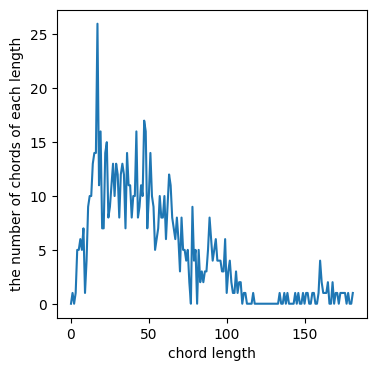

In [10]:
fig, ax = plt.subplots(1, 1, figsize=[4, 4])
ax.plot(np.bincount(chord_length))
plt.xlabel("chord length")
plt.ylabel("the number of chords of each length");

In [11]:
np.bincount(chord_length)

array([ 0,  1,  0,  1,  5,  5,  6,  5,  7,  1,  4,  9, 10, 10, 13, 14, 14,
       26, 11, 16,  7,  7, 14, 15,  8,  9, 11, 13, 10, 13, 12,  8, 12, 13,
       12,  7, 14, 11, 11,  8, 10, 10, 16,  8,  9, 11, 10, 17, 16,  7, 10,
       14, 10,  9,  5,  6,  7, 10,  8,  8, 10,  6,  9, 12, 11,  8,  7,  6,
        8,  6,  3,  8,  5,  5,  4,  5,  2,  0,  9,  4,  5,  0,  5,  2,  3,
        2,  3,  3,  5,  8,  6,  4,  5,  6,  4,  4,  4,  3,  3,  6,  1,  3,
        4,  2,  1,  1,  3,  1,  2,  2,  0,  1,  1,  0,  0,  0,  0,  1,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  1,  0,
        0,  1,  0,  1,  0,  0,  0,  0,  1,  0,  1,  0,  0,  1,  0,  1,  1,
        0,  0,  1,  1,  0,  0,  1,  4,  2,  1,  1,  1,  2,  0,  0,  2,  0,
        1,  1,  0,  1,  1,  1,  1,  0,  1,  0,  0,  1])